### Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#storing the feature/description pairs in a dictionary for quick reference.

data_info = {'date': 'time year-month-day hour:minute:second', 'Appliances': 'energy use in Wh',
'lights': 'energy use of light fixtures in the house in Wh', 'T1': 'Temperature in kitchen area, in Celsius',
'RH_1': 'Humidity in kitchen area, in %', 'T2': 'Temperature in living room area, in Celsius',
'RH_2': 'Humidity in living room area, in %', 'T3': 'Temperature in laundry room area',
'RH_3': 'Humidity in laundry room area, in %', 'T4': 'Temperature in office room, in Celsius',
'RH_4': 'Humidity in office room, in %', 'T5': 'Temperature in bathroom, in Celsius',
'RH_5': 'Humidity in bathroom, in %', 'T6': 'Temperature outside the building (north side), in Celsius',
'RH_6': 'Humidity outside the building (north side), in %', 'T7': 'Temperature in ironing room , in Celsius',
'RH_7': 'Humidity in ironing room, in %', 'T8': 'Temperature in teenager room 2, in Celsius',
'RH_8': 'Humidity in teenager room 2, in %', 'T9': 'Temperature in parents room, in Celsius',
'RH_9': 'Humidity in parents room, in %', 'T_out': 'Temperature outside (from Chievres weather station), in Celsius',
'Press_mm_hg': 'Pressure (from Chievres weather station), in mm Hg',
'RH_out': 'Humidity outside (from Chievres weather station), in %',
'Windspeed': 'Wind speed (from Chievres weather station), in m/s', 
'Visibility': 'Visisbility (from Chievres weather station), in km',
'Tdewpoint': 'Tdewpoint (from Chievres weather station), Â°C',
'rv1': 'Random variable 1, nondimensional', 'rv2': 'Random variable 2, nondimensional'}

#T_out other name is To

### Loading the data

In [3]:
energy_data = pd.read_csv('./Documents/hamoye_practice_datasets/energydata_complete.csv')
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
assert list(energy_data.columns) == list(data_info.keys()) #confirms that I didn't miss any column as a key in data_info dict.

In [5]:
#breaking up the features into the 3 categories of houses, weather station and random variable
features_from_houses = energy_data.columns[:21]
features_from_weather_station = energy_data.columns[21:27]
random_variable = energy_data.columns[27:]

#confirms that no column was omitted in the classification
assert list(features_from_houses) + list(features_from_weather_station) + list(random_variable) == list(energy_data.columns)

In [6]:
energy_data.shape #checking the shape

(19735, 29)

In [7]:
sum(energy_data.isnull().sum()) #checking for Nan values

0

In [8]:
energy_data.dtypes #checking the data types of each column

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [9]:
energy_data_summary = energy_data.describe() #checks the summary statistics
energy_data_summary

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [10]:
#'date' column wasn't included in the summary statistics because it contains string data type.

### Heat map showing collinearity amongst features

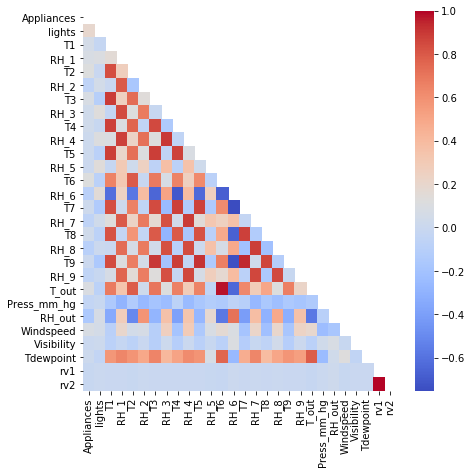

In [11]:
energy_data_corr_df = energy_data.corr()

mask = np.triu(np.ones((28, 28))) #to mask out the upper triangular matrix of the heatmap because the lower triangular matrix
                                  # alone contains all collinearity.

plt.figure(figsize=(7, 7)) 
sns.heatmap(energy_data_corr_df, mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm')
#xticklabels and yticklabels are set to True to display all columns in the heatmap

plt.show()

In [12]:
#it seems rv1 and rv2 have the heighest collinearity.

### Importing useful Machine Learning Libraries

In [13]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

#suppresses sklearn warning messages
import warnings
warnings.filterwarnings('ignore')

In [14]:
scaler = MinMaxScaler()

energy_data_modified = energy_data.drop(columns=['date', 'lights'])
cols_modified = energy_data_modified.columns

normed_energy_data = scaler.fit_transform(energy_data_modified)
normed_energy_data = pd.DataFrame(normed_energy_data, columns=cols_modified) #converting the numpy array from MinMaxScaler to 
                                                                             #pandas DataFrame
    
normed_energy_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [15]:
y = normed_energy_data.pop('Appliances')
X = normed_energy_data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [18]:
#creating a function to calculate Residual Sum of Squares Error (RSS)
def rss(ytrue, ypred):
    return np.sum((ytrue - ypred)**2)

In [19]:
#creating a function to calculate Root mean square error
def rmse(ytrue, ypred):
    return mse(ytrue, ypred, squared=False)

In [20]:
#creating a function that evaluates a metrics on true and pred set
def evaluate_model(y_true, y_pred, metric):
    metric_score = eval_metrics[metric](y_true, y_pred)
    print('{} score is {}'.format(metric, metric_score))
    return metric_score

In [21]:
eval_metrics = {'mae': mae, 'rss': rss, 'mse': mse, 'rmse': rmse, 'r2': r2} 

In [22]:
#evaluating different metrics on the training set
for metric in eval_metrics:
    evaluate_model(y_train, y_pred_train, metric)

mae score is 0.05022643091115382
rss score is 109.38774239255248
mse score is 0.007918614622307259
rmse score is 0.08898659799265987
r2 score is 0.14471942308518737


In [23]:
#evaluating different metrics on the testing set
for metric in eval_metrics:
    evaluate_model(y_test, y_pred_test, metric)

mae score is 0.05013362397742957
rss score is 45.34762967266377
mse score is 0.007658778867195367
rmse score is 0.0875144494766171
r2 score is 0.14890246319303535


In [24]:
#creating a function to calculate the weights of a given model
def get_weights(model, X, y, weights_name):
    cols = X.columns
    model.fit(X, y)
    weights = model.coef_
    return pd.DataFrame({'features': cols, weights_name: weights}).sort_values(by=weights_name)

In [25]:
linear = LinearRegression()
linear_weights = get_weights(linear, X_train, y_train, 'linear_weights')

### Question 12

In [26]:
Xt2 = np.array(energy_data['T2']).reshape(-1, 1)
yt6 = np.array(energy_data['T6']).reshape(-1, 1)

In [27]:
Xt2_train, Xt2_test, yt6_train, yt6_test = train_test_split(Xt2, yt6, test_size=0.3, random_state=42)

In [28]:
lin_reg_t2_t6 = LinearRegression()
lin_reg_t2_t6.fit(Xt2_train, yt6_train)
yt6_pred_test = lin_reg_t2_t6.predict(Xt2_test)

In [29]:
evaluate_model(yt6_test, yt6_pred_test, 'r2')

r2 score is 0.6427789637197382


0.6427789637197382

### Question 13

In [30]:
evaluate_model(y_test, y_pred_test, 'mae')

mae score is 0.05013362397742957


0.05013362397742957

### Question 14

In [31]:
evaluate_model(y_test, y_pred_test, 'rss')

rss score is 45.34762967266377


45.34762967266377

### Question 15

In [32]:
evaluate_model(y_test, y_pred_test, 'rmse')

rmse score is 0.0875144494766171


0.0875144494766171

### Question 16

In [33]:
evaluate_model(y_test, y_pred_test, 'r2')

r2 score is 0.14890246319303535


0.14890246319303535

### Question 17

In [34]:
print([linear_weights['features'].iloc[0], linear_weights['features'].iloc[-1]])

['RH_2', 'RH_1']


### Question 18

In [35]:
ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)
y_pred_test_ridge = ridge.predict(X_test)

In [36]:
evaluate_model(y_test, y_pred_test_ridge, 'rmse')

rmse score is 0.08753385704628004


0.08753385704628004

### Question 19

In [37]:
lasso = Lasso(alpha=0.001)

In [38]:
lasso_weights = get_weights(lasso, X_train, y_train, 'lasso_weights')

In [39]:
non_zero = lasso_weights[lasso_weights['lasso_weights'] != 0]
non_zero.shape[0]

4

### Question 20

In [40]:
lasso.fit(X_train, y_train)
y_pred_test_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_test_lasso, 'rmse')

rmse score is 0.09358170467245137


0.09358170467245137